In [2]:
import numpy as np
import pandas as pd

In [3]:
crop = pd.read_csv("/content/Crop_recommendation.csv")
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
crop.shape

(2200, 8)

In [5]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
crop.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [7]:
crop.duplicated().sum()

np.int64(0)

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report ,precision_score, recall_score, f1_score


In [9]:
le = LabelEncoder()
crop['label'] = le.fit_transform(crop['label'])

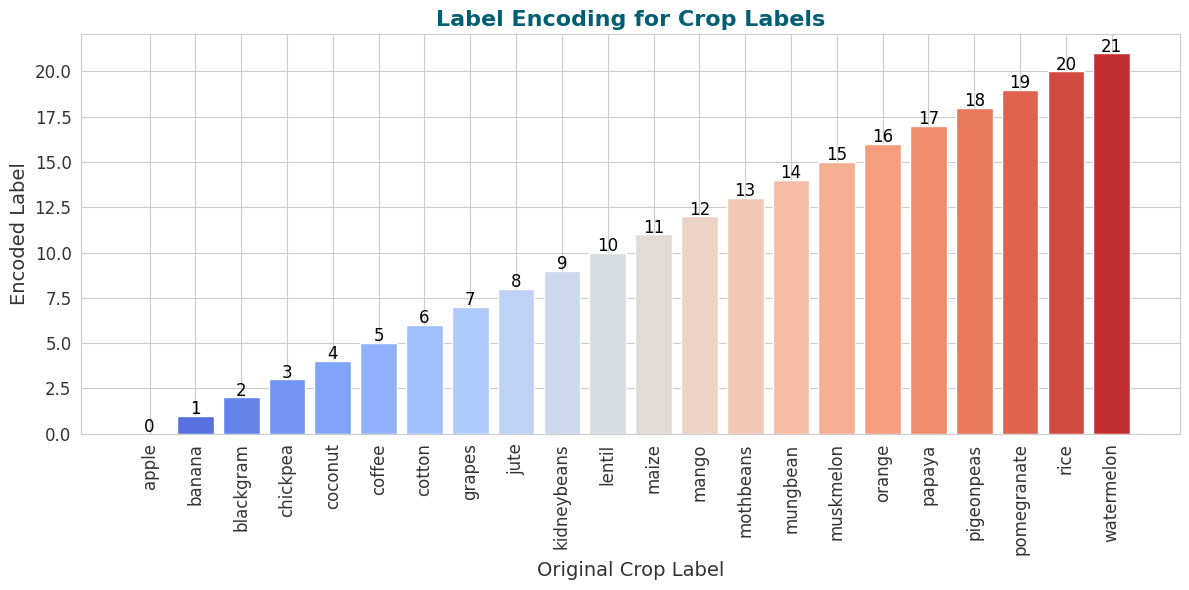

In [10]:

# Import necessary libraries

import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame with the original labels and their corresponding encoded values
label_mapping = pd.DataFrame({'Original Label': le.classes_, 'Encoded Label': le.transform(le.classes_)})

# Set figure size
plt.figure(figsize=(12, 6))

# Set a clean background style with gridlines for a clearer look
sns.set_style("whitegrid")

# Use a gradient color palette to make it visually appealing
colors = sns.color_palette("coolwarm", len(label_mapping))

# Plot the bar chart
bars = plt.bar(label_mapping['Original Label'], label_mapping['Encoded Label'], color=colors)

# Add labels and title with customized font size and color
plt.xlabel('Original Crop Label', fontsize=14, color='#333333')
plt.ylabel('Encoded Label', fontsize=14, color='#333333')
plt.title('Label Encoding for Crop Labels', fontsize=16, fontweight='semibold', color='#005f73')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, fontsize=12, color='#333333')
plt.yticks(fontsize=12, color='#333333')

# Annotate each bar with its height (the encoded label) for clarity
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2.0, bar.get_height() + 0.1,
             f'{int(bar.get_height())}', ha='center', fontsize=12, color='black')

# Display the plot
plt.tight_layout()
plt.show()


In [11]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall,label
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,10.500000
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,6.345731
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,0.000000
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,5.000000
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,10.500000
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,16.000000
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,21.000000


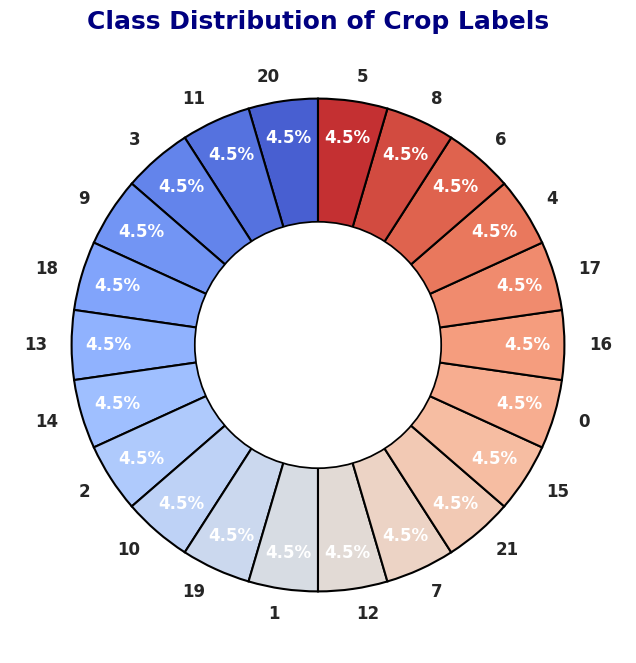

In [12]:
# Calculate the distribution of crop labels
label_counts = crop['label'].value_counts()

# Set up the figure size
plt.figure(figsize=(8, 8))

# Create the pie chart with a hole in the middle (donut chart)
colors = sns.color_palette("coolwarm", len(label_counts))  # Coolwarm palette for contrast
wedges, texts, autotexts = plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%',
                                   startangle=90, colors=colors, pctdistance=0.85,
                                   wedgeprops={'edgecolor': 'black', 'linewidth': 1.5, 'linestyle': 'solid'})

# Add a circle in the middle to create the donut hole (with a smaller radius now)
centre_circle = plt.Circle((0, 0), 0.5, fc='white', edgecolor='black', linewidth=1.25)  # Radius reduced from 0.70 to 0.60
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that the pie is drawn as a circle
plt.gca().set_aspect('equal')

# Styling the text elements (labels and percentages)
for text in texts:
    text.set_fontsize(12)
    text.set_fontweight('bold')

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')

# Removed the line causing the error:
# plt.pie(label_counts, colors=colors, wedgeprops={'edgecolor': 'black', 'linewidth': 1.5, 'linestyle': 'solid', 'shadow': True})
# The shadow property is not supported by the Wedge object.

# Add a title with enhanced font settings
plt.title('Class Distribution of Crop Labels', fontsize=18, fontweight='bold', color='navy')

# Show the chart
plt.show()

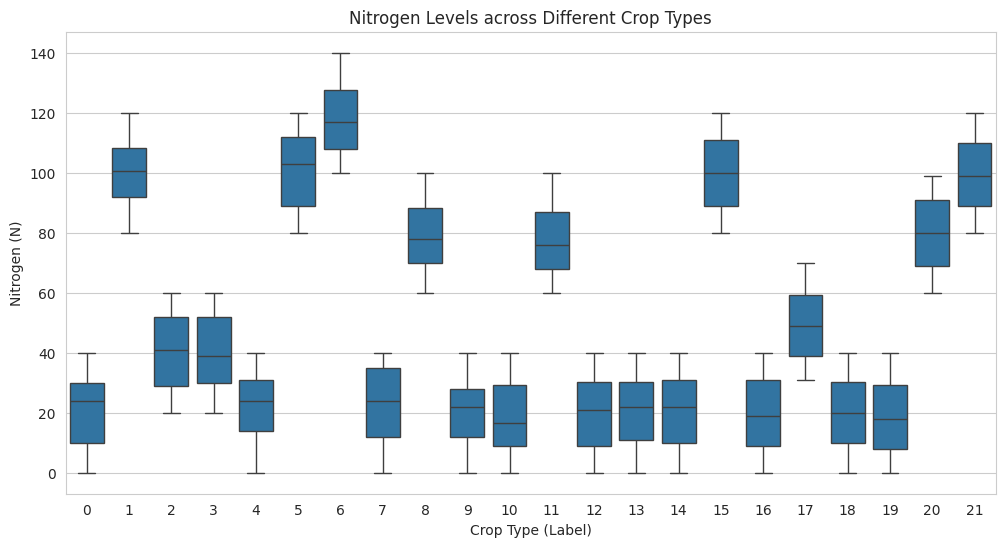

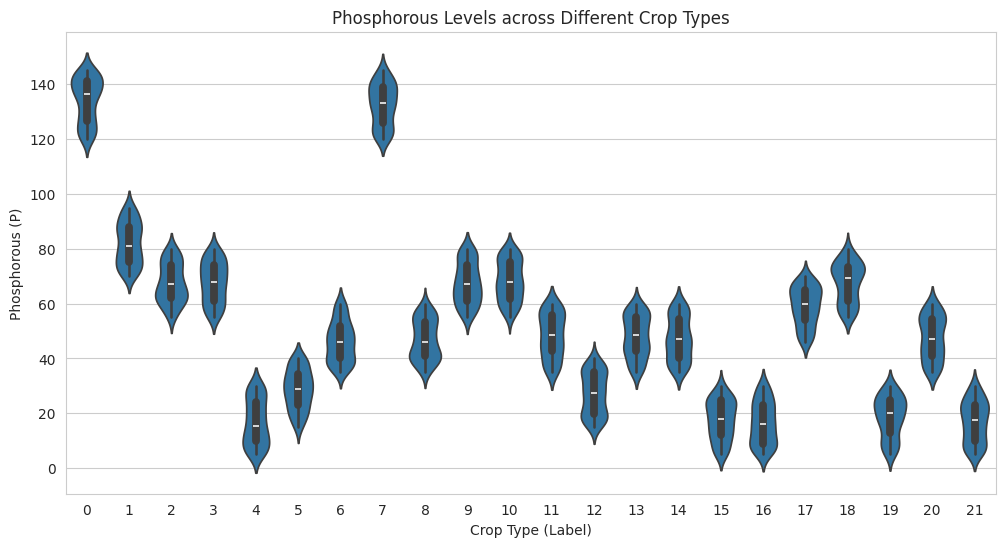

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 82.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


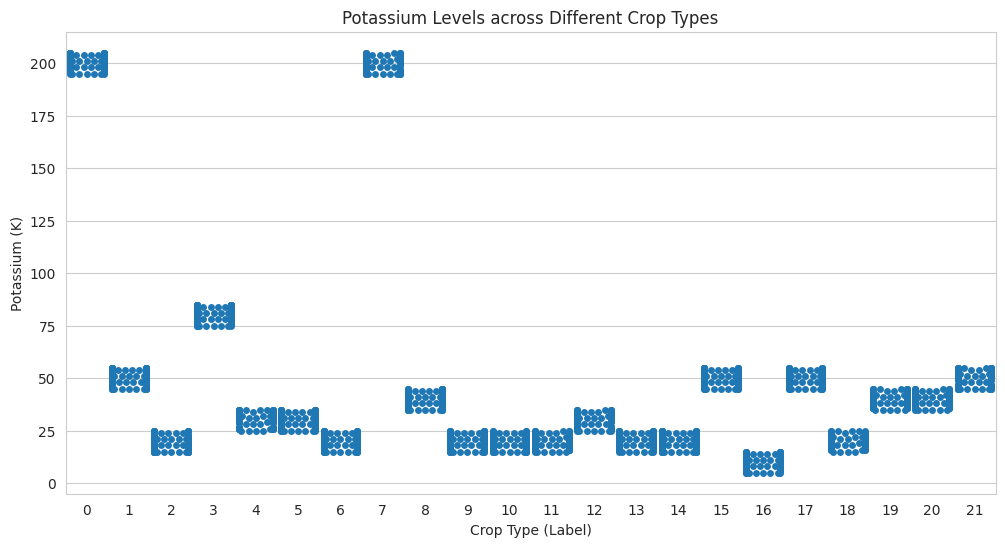

In [13]:
# prompt: visualize relation between any features and label

# Visualize the relationship between 'N' (Nitrogen) and 'label' (crop type)
plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='N', data=crop)
plt.title('Nitrogen Levels across Different Crop Types')
plt.xlabel('Crop Type (Label)')
plt.ylabel('Nitrogen (N)')
plt.show()

# Visualize the relationship between 'P' (Phosphorous) and 'label' (crop type)
plt.figure(figsize=(12, 6))
sns.violinplot(x='label', y='P', data=crop)
plt.title('Phosphorous Levels across Different Crop Types')
plt.xlabel('Crop Type (Label)')
plt.ylabel('Phosphorous (P)')
plt.show()

# Visualize the relationship between 'K' (Potassium) and 'label' (crop type)
plt.figure(figsize=(12, 6))
sns.swarmplot(x='label', y='K', data=crop)
plt.title('Potassium Levels across Different Crop Types')
plt.xlabel('Crop Type (Label)')
plt.ylabel('Potassium (K)')
plt.show()


In [14]:
crop['label'].unique()

array([20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
       17,  4,  6,  8,  5])

In [15]:
crop['label'].value_counts()

,count
label,
20,100
11,100
3,100
9,100
18,100
13,100
14,100
2,100
10,100


In [16]:
print(crop['label'].unique())

[20 11  3  9 18 13 14  2 10 19  1 12  7 21 15  0 16 17  4  6  8  5]


In [17]:

X = crop.drop(['label'],axis=1)
y = crop['label']

In [18]:
y

,label
0,20
1,20
2,20
3,20
4,20
...,...
2195,5
2196,5
2197,5
2198,5


In [19]:
y.shape

(2200,)

In [20]:
y.isnull().sum()


np.int64(0)

In [21]:
scaler = StandardScaler()
X= scaler.fit_transform(X)

In [22]:
X=pd.DataFrame(X,columns=['N','P','K','temperature','humidity','ph','rainfall'])

In [23]:
# prompt: split the train and text data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
X_train

,N,P,K,temperature,humidity,ph,rainfall
1656,-0.909043,-1.132946,-0.674398,-1.821200,0.929960,0.201688,-0.009455
752,-0.367169,0.777396,-0.575655,0.380754,-0.095869,0.871667,-0.619789
892,-1.179980,0.595459,-0.457163,0.376410,-0.375117,1.057918,-1.060229
1041,1.366828,0.504490,-0.002944,-0.050498,0.159495,-0.590341,0.238225
1179,-1.369636,-1.102623,-0.358420,1.947328,-1.056190,-0.246001,-0.103246
...,...,...,...,...,...,...,...
1638,-1.098699,-1.466498,-0.852136,-0.869746,0.892760,1.742612,0.173257
1095,1.556484,1.232240,-0.022693,0.344264,0.586936,-0.106039,-0.230247
1130,-1.071605,-0.526488,-0.338671,0.455179,-0.885140,0.007715,-0.058332
1294,-1.071605,2.141926,3.077842,-2.407135,0.385671,-0.140016,-0.583542


In [25]:
# prompt: normalize the x_train and x_test



In [26]:


# create instances of all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
}

# Variables to store predictions for specific models
y_pred_lr = None
y_pred_dt = None
y_pred_rf = None
y_pred_svm = None
y_pred_knn = None

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    ypred = model.predict(X_test)

    # Save predictions for specific models
    if name == 'Logistic Regression':
        y_pred_lr = ypred
    elif name == 'Decision Tree':
        y_pred_dt = ypred
    elif name == 'Random Forest':
        y_pred_rf = ypred
    elif name == 'Support Vector Machine':
        y_pred_svm = ypred
    elif name == 'K-Nearest Neighbors':
        y_pred_knn = ypred

    # Print classification report and accuracy for each model
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, ypred))

    print(f"{name} with accuracy: {accuracy_score(y_test, ypred)}")
    print("Confusion matrix: \n", confusion_matrix(y_test, ypred))
    print("==========================================================")

# Print classification reports for specific models after the loop
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_knn))



Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.90      0.95      0.93        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       0.94      1.00      0.97        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.83      0.87      0.85        23
           9       0.95      0.95      0.95        20
          10       0.85      1.00      0.92        11
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        19
          13       1.00      0.92      0.96        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00    

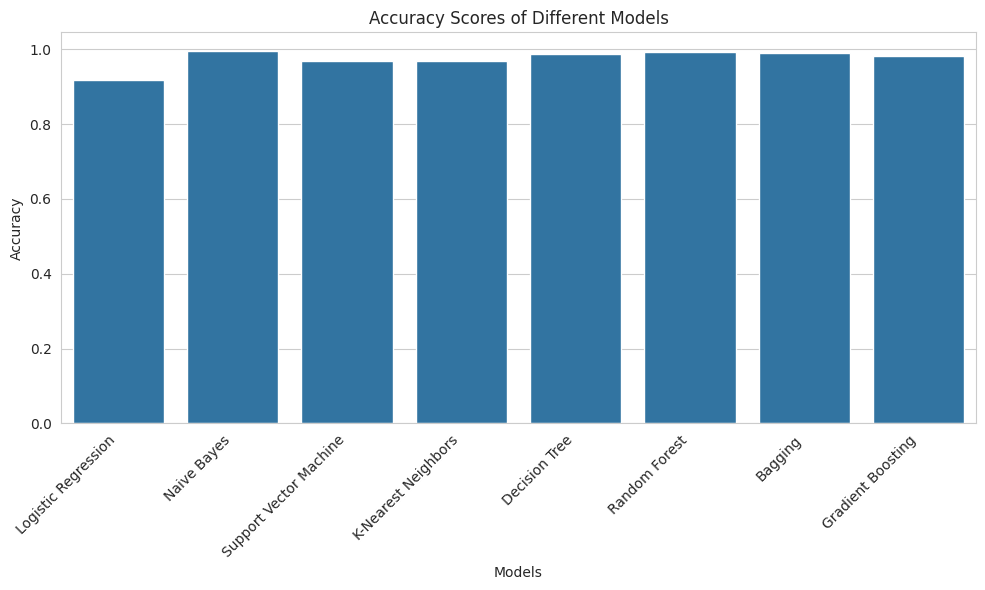

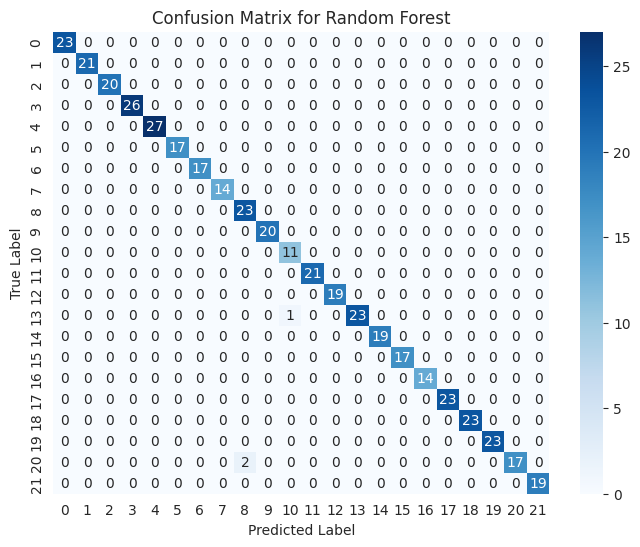

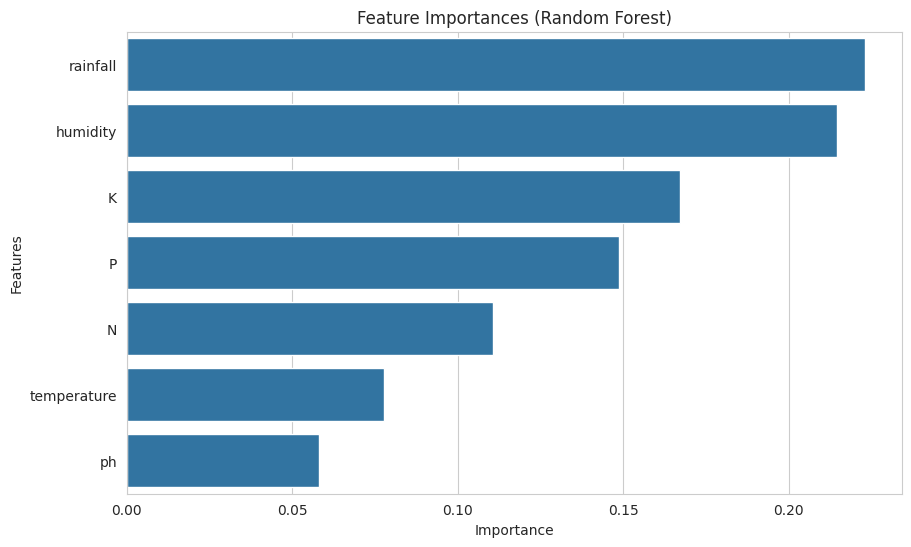

In [27]:
# finally selected randomforest model
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
ypred = rfc.predict(X_test)
accuracy_score(y_test,ypred)

0.9931818181818182

In [28]:
# or gausianjb
gnb = GaussianNB()
gnb.fit(X_train,y_train)
ypred = gnb.predict(X_test)
accuracy_score(y_test,ypred)

0.9954545454545455

In [29]:

from sklearn.model_selection import GridSearchCV

# Define a parameter grid for Logistic Regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['lbfgs', 'liblinear'],  # Solvers to optimize performance
    'max_iter': [100, 200, 300]  # Maximum number of iterations
}

# Initialize Logistic Regression model
logreg = LogisticRegression(random_state=42)

# Grid Search with cross-validation
grid_logreg = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_logreg.fit(X_train, y_train)

# Best parameters and score
print(f"Best parameters for Logistic Regression: {grid_logreg.best_params_}")
print(f"Best cross-validation accuracy for Logistic Regression: {grid_logreg.best_score_}")

# Predict using the best model
y_pred_logreg = grid_logreg.best_estimator_.predict(X_test)

# Evaluate accuracy on test set
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Test Accuracy: {accuracy_logreg:.4f}")


Best parameters for Logistic Regression: {'C': 100, 'max_iter': 100, 'solver': 'lbfgs'}
Best cross-validation accuracy for Logistic Regression: 0.9818181818181818
Logistic Regression Test Accuracy: 0.9682


In [30]:

# Define a parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

# Initialize KNN model
knn = KNeighborsClassifier()

# Grid Search with cross-validation
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)

# Best parameters and score
print(f"Best parameters for KNN: {grid_knn.best_params_}")
print(f"Best cross-validation accuracy for KNN: {grid_knn.best_score_}")

# Predict using the best model
y_pred_knn = grid_knn.best_estimator_.predict(X_test)

# Evaluate accuracy on test set
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Test Accuracy: {accuracy_knn:.4f}")


Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best cross-validation accuracy for KNN: 0.9829545454545455
KNN Test Accuracy: 0.9750


In [31]:
from sklearn.model_selection import cross_val_score

# Evaluate Logistic Regression with cross-validation
cv_scores_logreg = cross_val_score(grid_logreg.best_estimator_, X_train, y_train, cv=5)
print(f"Logistic Regression CV Mean Accuracy: {cv_scores_logreg.mean():.4f}")

# Evaluate KNN with cross-validation
cv_scores_knn = cross_val_score(grid_knn.best_estimator_, X_train, y_train, cv=5)
print(f"KNN CV Mean Accuracy: {cv_scores_knn.mean():.4f}")


Logistic Regression CV Mean Accuracy: 0.9818
KNN CV Mean Accuracy: 0.9830


LightGBM Test Accuracy: 0.9864

LightGBM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      0.95      0.98        21
          12       0.95      1.00      0.97        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16     

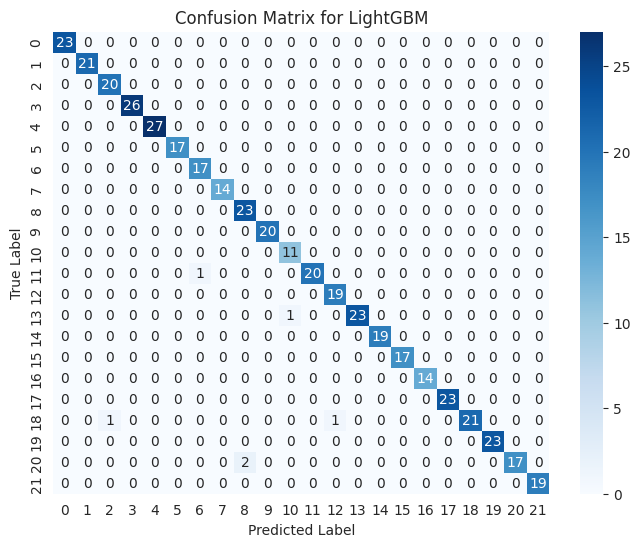

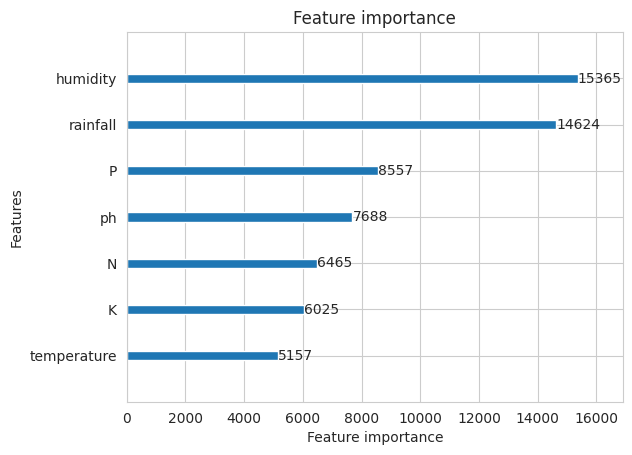

In [33]:
# prompt: use lightgbm

import lightgbm as lgb

# Create a LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

# Define parameters for LightGBM
params = {
    'objective': 'multiclass',  # Multi-class classification
    'num_class': len(crop['label'].unique()),  # Number of classes
    'metric': 'multi_logloss',  # Evaluation metric
    'boosting_type': 'gbdt',  # Gradient boosting decision tree
    'learning_rate': 0.05,  # Learning rate
    'num_leaves': 31,  # Maximum number of leaves in one tree
    'max_depth': -1,  # Maximum depth of the tree
    'verbose': -1  # Verbosity level
}

# Train the LightGBM model
model = lgb.train(params, train_data, num_boost_round=100, valid_sets=[test_data])

# Make predictions on the test set
y_pred_lgbm = model.predict(X_test)

# Convert predictions to class labels
y_pred_lgbm_classes = [np.argmax(line) for line in y_pred_lgbm]

# Evaluate the model
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm_classes)
print(f"LightGBM Test Accuracy: {accuracy_lgbm:.4f}")

# Print classification report
print(f"\nLightGBM Classification Report:")
print(classification_report(y_test, y_pred_lgbm_classes))

# Confusion matrix
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lgbm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for LightGBM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Feature importance plot
lgb.plot_importance(model)
plt.show()

XGBoost Test Accuracy: 0.9864

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.96      0.96      0.96        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      0.95      0.98        21
          12       0.95      1.00      0.97        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       

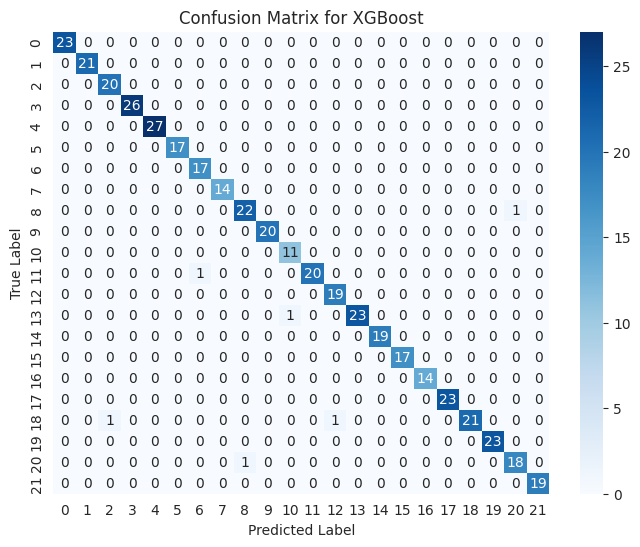

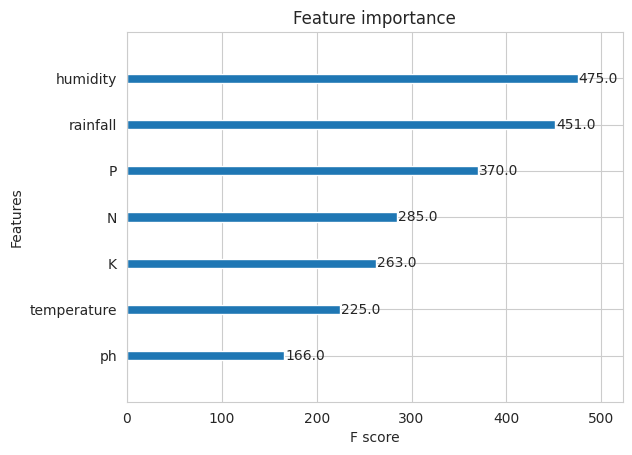

In [34]:
# prompt: use xgboost

import xgboost as xgb

# Create an XGBoost classifier
xgb_model = xgb.XGBClassifier(objective="multi:softmax", num_class=len(crop['label'].unique()))

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Test Accuracy: {accuracy_xgb:.4f}")

# Print classification report
print(f"\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for XGBoost')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Feature importance plot
xgb.plot_importance(xgb_model)
plt.show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 11.3 MB/s eta 0:00:00
CatBoost Test Accuracy: 0.9841
CatBoost Test Precision: 0.985496558996559
CatBoost Test Recall: 0.9840909090909091
CatBoost Test F1-Score: 0.9841068010780846

CatBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       0.95      1.00      0.98        20
          10       0.85      1.00      0.92        11
          11       1.00      0.95      0.98        21
          12       1.00    

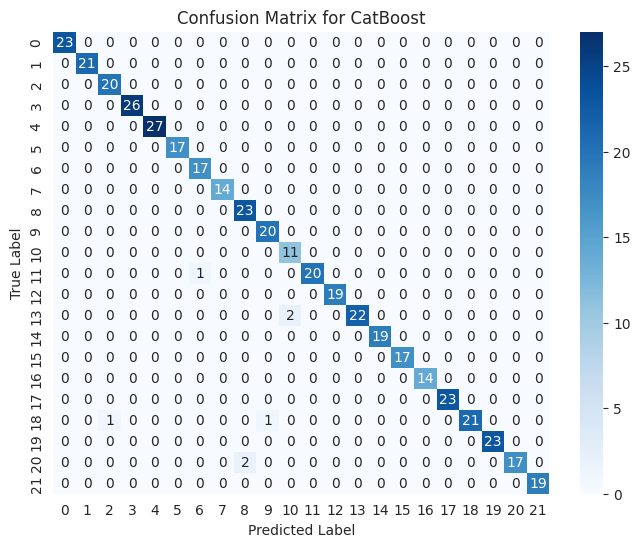

,Feature Id,Importances
0,humidity,23.048021
1,K,19.366206
2,rainfall,18.455632
3,N,17.408412
4,P,13.974601
5,temperature,6.053769
6,ph,1.693360


In [35]:
# prompt: use cat boost

# Install catboost if not already installed
!pip install catboost

from catboost import CatBoostClassifier

# Create a CatBoost classifier
catboost_model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, loss_function='MultiClass')

# Train the model
catboost_model.fit(X_train, y_train, verbose=False)

# Make predictions
y_pred_catboost = catboost_model.predict(X_test)

# Evaluate the model
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
print(f"CatBoost Test Accuracy: {accuracy_catboost:.4f}")
print(f"CatBoost Test Precision: {precision_score(y_test, y_pred_catboost, average='weighted')}")
print(f"CatBoost Test Recall: {recall_score(y_test, y_pred_catboost, average='weighted')}")
print(f"CatBoost Test F1-Score: {f1_score(y_test, y_pred_catboost, average='weighted')}")
# Print classification report
print(f"\nCatBoost Classification Report:")
print(classification_report(y_test, y_pred_catboost))

# Confusion matrix
cm_catboost = confusion_matrix(y_test, y_pred_catboost)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_catboost, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for CatBoost')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Feature importance plot
catboost_model.get_feature_importance(prettified=True)

In [36]:
# prompt: use grid search on naive Bayes and rfc

# Define the parameter grid for Naive Bayes
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

# Initialize Naive Bayes model
nb = GaussianNB()

# Grid Search with cross-validation
grid_nb = GridSearchCV(nb, param_grid_nb, cv=5, scoring='accuracy')
grid_nb.fit(X_train, y_train)

# Best parameters and score
print(f"Best parameters for Naive Bayes: {grid_nb.best_params_}")
print(f"Best cross-validation accuracy for Naive Bayes: {grid_nb.best_score_}")

# Predict using the best model
y_pred_nb = grid_nb.best_estimator_.predict(X_test)

# Evaluate accuracy on test set
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Test Accuracy: {accuracy_nb:.4f}")


# Define the parameter grid for Random Forest Classifier
param_grid_rfc = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest Classifier model
rfc = RandomForestClassifier()

# Grid Search with cross-validation
grid_rfc = GridSearchCV(rfc, param_grid_rfc, cv=5, scoring='accuracy')
grid_rfc.fit(X_train, y_train)

# Best parameters and score
print(f"Best parameters for Random Forest Classifier: {grid_rfc.best_params_}")
print(f"Best cross-validation accuracy for Random Forest Classifier: {grid_rfc.best_score_}")

# Predict using the best model
y_pred_rfc = grid_rfc.best_estimator_.predict(X_test)

# Evaluate accuracy on test set
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
print(f"Random Forest Classifier Test Accuracy: {accuracy_rfc:.4f}")

Best parameters for Naive Bayes: {'var_smoothing': np.float64(0.001873817422860383)}
Best cross-validation accuracy for Naive Bayes: 0.9954545454545455
Naive Bayes Test Accuracy: 0.9932
Best parameters for Random Forest Classifier: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best cross-validation accuracy for Random Forest Classifier: 0.9954545454545454
Random Forest Classifier Test Accuracy: 0.9932


0:	learn: 2.3790048	total: 30.9ms	remaining: 3.05s
1:	learn: 1.9888374	total: 56.1ms	remaining: 2.75s
2:	learn: 1.7113599	total: 98.9ms	remaining: 3.2s
3:	learn: 1.5093212	total: 125ms	remaining: 3s
4:	learn: 1.3398548	total: 149ms	remaining: 2.84s
5:	learn: 1.2068103	total: 176ms	remaining: 2.75s
6:	learn: 1.0844760	total: 200ms	remaining: 2.66s
7:	learn: 0.9848103	total: 226ms	remaining: 2.6s
8:	learn: 0.8966260	total: 253ms	remaining: 2.56s
9:	learn: 0.8227159	total: 278ms	remaining: 2.5s
10:	learn: 0.7524792	total: 304ms	remaining: 2.46s
11:	learn: 0.6993527	total: 329ms	remaining: 2.41s
12:	learn: 0.6482869	total: 353ms	remaining: 2.36s
13:	learn: 0.6021399	total: 378ms	remaining: 2.32s
14:	learn: 0.5633471	total: 403ms	remaining: 2.28s
15:	learn: 0.5275685	total: 428ms	remaining: 2.25s
16:	learn: 0.4923880	total: 457ms	remaining: 2.23s
17:	learn: 0.4632715	total: 482ms	remaining: 2.2s
18:	learn: 0.4346031	total: 507ms	remaining: 2.16s
19:	learn: 0.4096234	total: 532ms	remaining: 

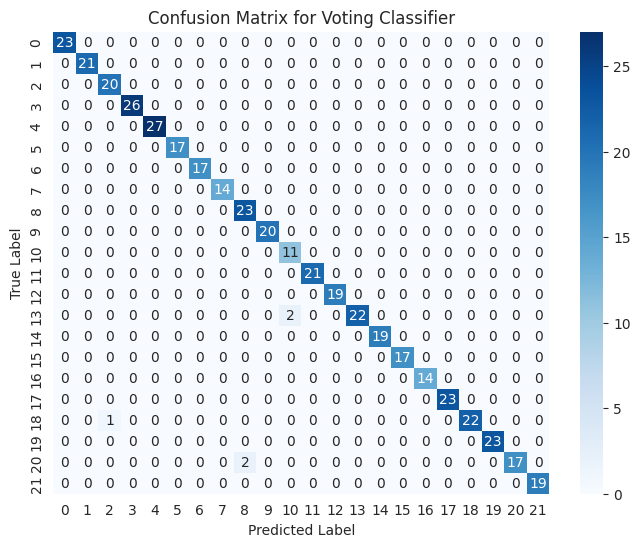

In [37]:
# prompt: do voting classifier for random forest and any boosting

from sklearn.ensemble import VotingClassifier

# Assuming you have already trained your Random Forest and Gradient Boosting models
# Replace 'rfc' and 'gbc' with your actual trained model objects
rfc = RandomForestClassifier()  # Or your tuned Random Forest model
gbc = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, loss_function='MultiClass')  # Or your tuned Gradient Boosting model

# Create a voting classifier with 'hard' voting (majority vote)
voting_clf = VotingClassifier(estimators=[('rf', rfc), ('gb', gbc)], voting='soft')

# Train the voting classifier
voting_clf.fit(X_train, y_train)

# Make predictions using the voting classifier
y_pred_voting = voting_clf.predict(X_test)

# Evaluate the voting classifier's performance
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f"Voting Classifier Test Accuracy: {accuracy_voting:.4f}")
# Print classification report
print(f"\nVoting Classifier Classification Report:")
print(classification_report(y_test, y_pred_voting))

# Confusion matrix
cm_voting = confusion_matrix(y_test, y_pred_voting)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_voting, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Voting Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Voting Classifier Test Accuracy: 0.9955
Voting Classifier Test Precision: 0.9958181818181817
Voting Classifier Test Recall: 0.9954545454545455
Voting Classifier Test F1-Score: 0.9954229797979799

Voting Classifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
      

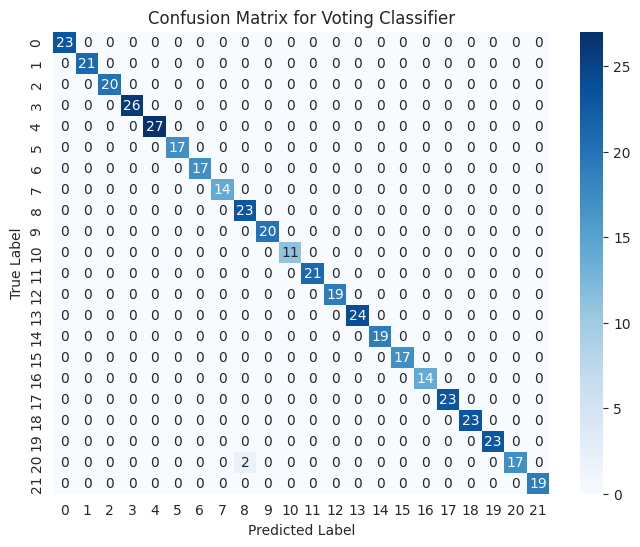

In [38]:
# prompt: create an ensemble model to get the accuracy more that naive Bayes and randomforest

from sklearn.ensemble import VotingClassifier

rfc = RandomForestClassifier()
gbc = GaussianNB()



voting_clf = VotingClassifier(estimators=[('rf', rfc), ('gb', gbc)], voting='soft')

voting_clf.fit(X_train, y_train)

# Make predictions using the voting classifier
y_pred_voting = voting_clf.predict(X_test)

# Evaluate the voting classifier's performance
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f"Voting Classifier Test Accuracy: {accuracy_voting:.4f}")
print(f"Voting Classifier Test Precision: {precision_score(y_test, y_pred_voting, average='weighted')}")
print(f"Voting Classifier Test Recall: {recall_score(y_test, y_pred_voting, average='weighted')}")
print(f"Voting Classifier Test F1-Score: {f1_score(y_test, y_pred_voting, average='weighted')}")
# Print classification report
print(f"\nVoting Classifier Classification Report:")
print(classification_report(y_test, y_pred_voting))

# Confusion matrix
cm_voting = confusion_matrix(y_test, y_pred_voting)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_voting, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Voting Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

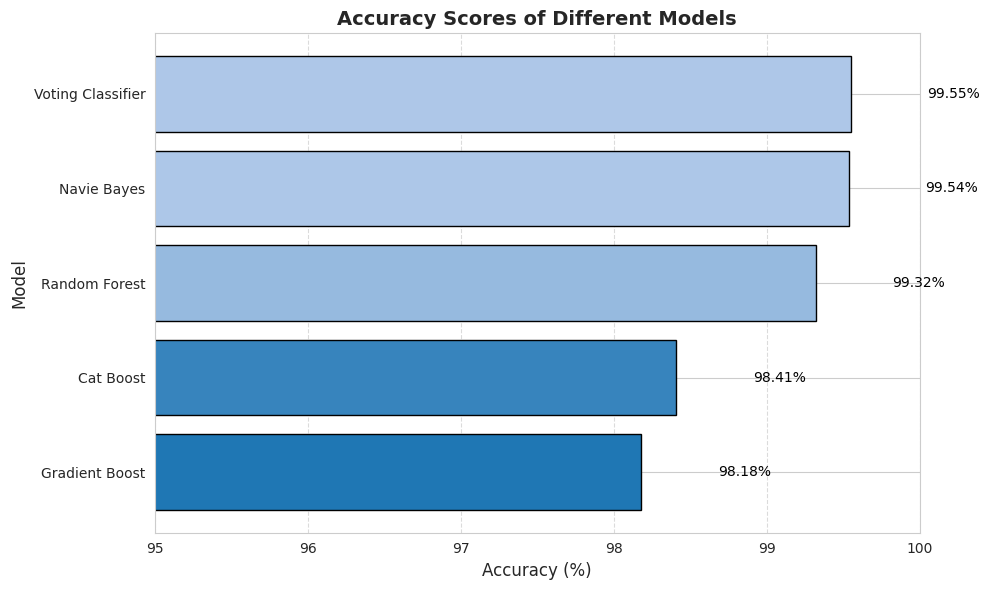

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap

models = {
    'Navie Bayes': 99.54,
    'Random Forest': 99.32,
    'Voting Classifier': 99.55,
    'Cat Boost': 98.41,
    'Gradient Boost':98.18,
}

# Convert to DataFrame for easier sorting
model_df = pd.DataFrame({'Model': models.keys(), 'Accuracy': models.values()})
model_df = model_df.sort_values(by='Accuracy', ascending=False)  # Sort by accuracy

# Get top 5
top_5_models = model_df.head(5)

# Define a gradient colormap
colors = LinearSegmentedColormap.from_list('gradient', ['#1f77b4', '#aec7e8'])

# Normalize data for color mapping
norm = plt.Normalize(min(top_5_models['Accuracy']), max(top_5_models['Accuracy']))

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.barh(
    top_5_models['Model'],
    top_5_models['Accuracy'],
    color=[colors(norm(acc)) for acc in top_5_models['Accuracy']],
    edgecolor='black'
)

# Adding data labels
for bar, acc in zip(bars, top_5_models['Accuracy']):
    plt.text(
        bar.get_width() + 0.5,  # Position text slightly right of bar
        bar.get_y() + bar.get_height() / 2,  # Center vertically
        f'{acc}%',  # Format the text
        va='center', ha='left', fontsize=10, color='black'
    )

# Customize plot
plt.xlabel('Accuracy (%)', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.title('Accuracy Scores of Different Models', fontsize=14, fontweight='bold')
plt.xlim(95, 100)  # Adjust limits for better focus
plt.gca().invert_yaxis()  # Keep the highest score at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid lines for x-axis

plt.tight_layout()  # Adjust layout to fit elements
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')